<a href="https://colab.research.google.com/github/Ykulkarni-ops/MNIST-/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

# Download training dataset
dataset = MNIST(root='data/', download=True)

In [3]:
import torchvision.transforms as transforms
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [4]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [5]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


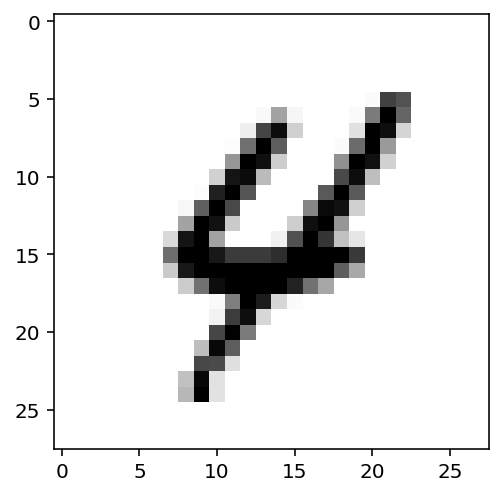

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

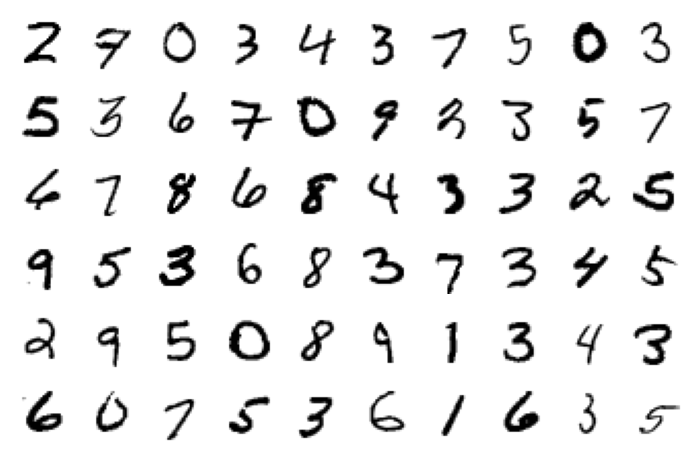

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [11]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [12]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [13]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [14]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(train_loader))
images.resize_(128, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0307, -0.0228,  0.0069,  ..., -0.0030,  0.0209,  0.0098],
        [ 0.0092,  0.0355,  0.0118,  ..., -0.0173,  0.0177,  0.0033],
        [-0.0260,  0.0083, -0.0251,  ..., -0.0170, -0.0243,  0.0325],
        ...,
        [ 0.0279,  0.0235,  0.0291,  ..., -0.0274, -0.0337,  0.0296],
        [ 0.0287,  0.0297,  0.0344,  ..., -0.0166, -0.0020, -0.0146],
        [ 0.0307, -0.0190,  0.0316,  ..., -0.0183, -0.0280, -0.0069]],
       requires_grad=True)
Gradient - tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [15]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0307, -0.0228,  0.0069,  ..., -0.0030,  0.0209,  0.0098],
        [ 0.0092,  0.0355,  0.0118,  ..., -0.0173,  0.0177,  0.0033],
        [-0.0260,  0.0083, -0.0251,  ..., -0.0170, -0.0243,  0.0325],
        ...,
        [ 0.0279,  0.0235,  0.0291,  ..., -0.0274, -0.0337,  0.0296],
        [ 0.0287,  0.0297,  0.0344,  ..., -0.0166, -0.0020, -0.0146],
        [ 0.0307, -0.0190,  0.0316,  ..., -0.0183, -0.0280, -0.0069]],
       requires_grad=True)


In [16]:
optimizer = optim.Adam(model.parameters(), lr=0.003)
time0 = time()
epochs = 200
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.31586479485187385
Epoch 1 - Training loss: 0.13108567759642364
Epoch 2 - Training loss: 0.08914306721009334
Epoch 3 - Training loss: 0.06752089125073284
Epoch 4 - Training loss: 0.055587643401368576
Epoch 5 - Training loss: 0.03942730532878119
Epoch 6 - Training loss: 0.03815266153569121
Epoch 7 - Training loss: 0.02772302793450844
Epoch 8 - Training loss: 0.026638961417953032
Epoch 9 - Training loss: 0.024675402217907854
Epoch 10 - Training loss: 0.022952556188287968
Epoch 11 - Training loss: 0.020982441434617655
Epoch 12 - Training loss: 0.018512164350569873
Epoch 13 - Training loss: 0.01660678654752003
Epoch 14 - Training loss: 0.02107797334584898
Epoch 15 - Training loss: 0.01766665733598448
Epoch 16 - Training loss: 0.016502495240451366
Epoch 17 - Training loss: 0.009411058978710111
Epoch 18 - Training loss: 0.015009773457261144
Epoch 19 - Training loss: 0.019916533784995326
Epoch 20 - Training loss: 0.01475944206406049
Epoch 21 - Training loss: 0.016998

In [17]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 6


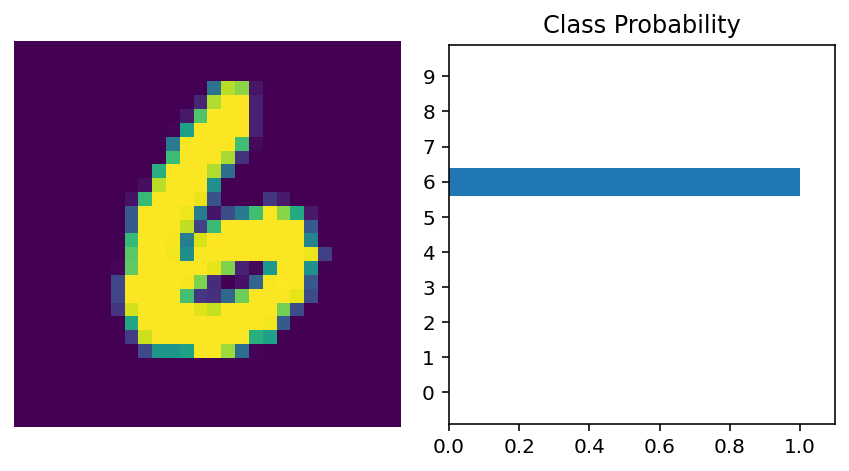

In [18]:
images, labels = next(iter(val_loader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [19]:
correct_count, all_count = 0, 0
for images,labels in val_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.977
